# Inventories Deliverable December 2021

In [1]:
import pandas as pd

import os
from tqdm import tqdm

import glob 
import plotly
import plotly.express as px
import plotly.graph_objects as go
#import dash  # (version 1.12.0) pip install dash

import numpy as np 

from plotly.offline import iplot, init_notebook_mode



In [2]:
os.getcwd()

'/srvfs/home/federico/GitHub/CEUAS_master_JULY2922/CEUAS/CEUAS/meta/inventory_comparison_2/code/notebooks'

### Extracting the data from the saved CSV files CUON station_configuration

In [3]:
stat_conf_dir = '../station_configuration'

name = '_station_configuration_extended.csv'
allds = ['ncar','igra2','amma','hara', 'bufr', 'giub','bufr_cnr']
ecmwf = ['era5_1','era5_2','era5_1759', 'era5_1761' ]


In [31]:
all_stat_conf = [ f for f in os.listdir( stat_conf_dir) ]

# [x + y for x in l2 for y in l1 ]
all_ecmwf_df = []
for e in ecmwf:
    df = pd.read_csv( '../station_configuration/'+e+'_station_configuration_extended.csv', sep = '\t' )
    df['dataset'] = 'ECMWF'
    all_ecmwf_df.append(df)

df_ecmwf = pd.concat(all_ecmwf_df)
df_ecmwf = df_ecmwf.drop_duplicates( subset=['primary_id'] )
df_ecmwf = df_ecmwf[['primary_id','latitude','longitude','dataset']]


dic_names = {'ncar':'NCAR',
       'igra2':"IGRA2",
       'amma':"AMMA",
       'hara':"HARA",
       'giub': "GIUB",
       'bufr':"BUFR", 
       "bufr_cnr": "BUFR HIGH RES",
            }


other_ds = []
for e in allds:
    df = pd.read_csv( '../station_configuration/'+e+'_station_configuration_extended.csv', sep = '\t' )
    df['dataset'] = dic_names[e]
    print(e, '  ' , len(df))
    other_ds.append(df)

other_ds = pd.concat(other_ds)
other_ds = other_ds[['primary_id','latitude','longitude','dataset']]


all_df = pd.concat([other_ds, df_ecmwf])

#all_df = all_df.sample(frac=0.05)


ncar    3713
igra2    2779
amma    67
hara    87
bufr    2728
giub    1748
bufr_cnr    902


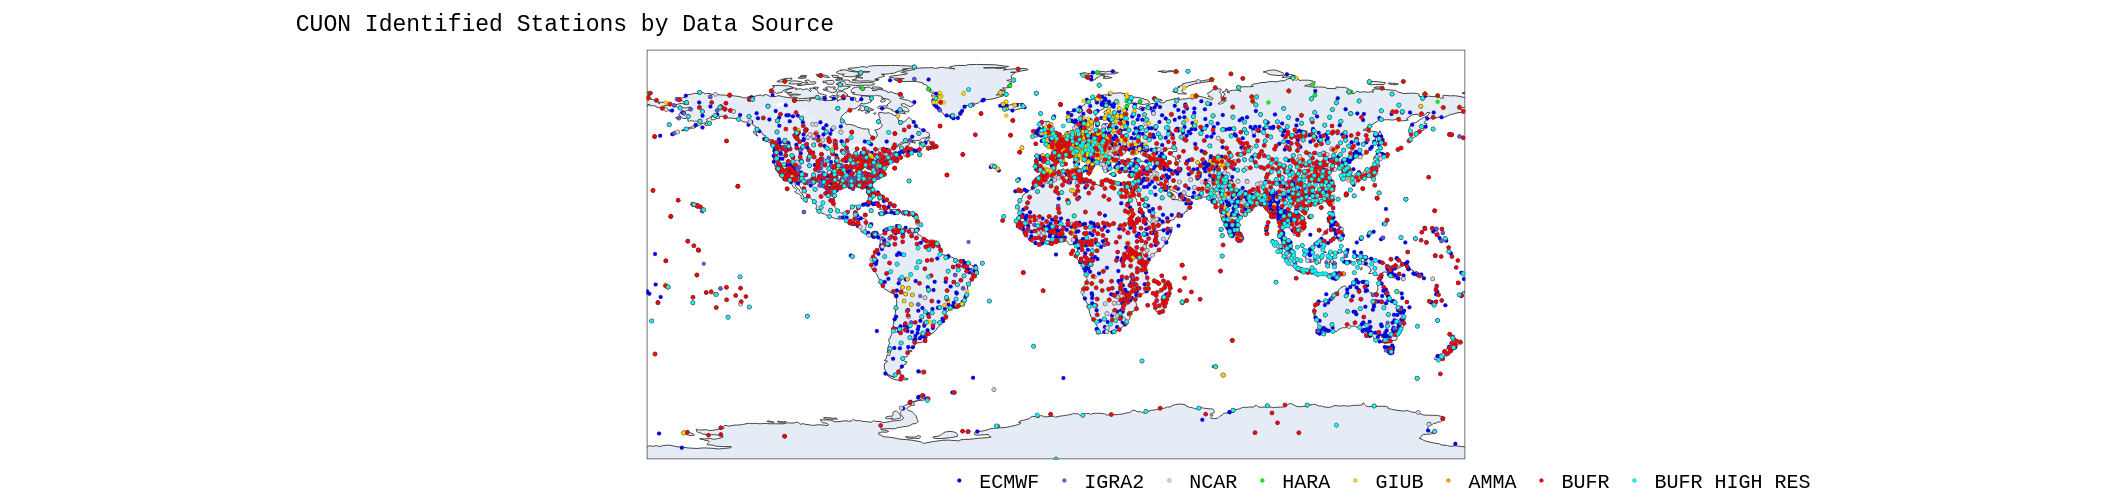

In [34]:

###
colors = ['blue','slateblue','lightgray','lime','gold','orange','red', 'cyan']

fig = go.Figure()
for s,c in zip( ["ECMWF",'IGRA2',"NCAR", 'HARA', 'GIUB', 'AMMA', 'BUFR', "BUFR HIGH RES"] , colors):
    # print(s,c)
    dff = all_df[all_df.dataset == s ]
    fig.add_trace(go.Scattergeo(
            lon = dff['longitude'],
            lat = dff['latitude'],
            #text = dff['text'],
            mode = 'markers',
            name = s,
            marker = dict(
                size=4,
                color = c,
                line_color='rgb(40,40,40)',
                line_width=0.2,
                sizemode='area',
            )
    ))

fig.update_layout(
    title = { 'text': "CUON Identified Stations by Data Source", 
                 'font': { 'family': "Courier", 'size':23, 'color':"black"},
        'y':0.97,
        'x':0.14,
        'yanchor': 'top',},
    
    margin=dict(l=0, r=1, t=50, b=1),
    paper_bgcolor="white",
    width=1200,
    height=500,
    
    legend = dict(font = dict(family = "Courier", size = 20, color = "black") ,

           orientation="h",
            yanchor="bottom",
            y=-0.1,
            xanchor="right",
            x=0.86),
    
            legend_title = dict(font = dict(family = "Courier", size = 30, color = "blue"))
    

)

fig.show()